In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

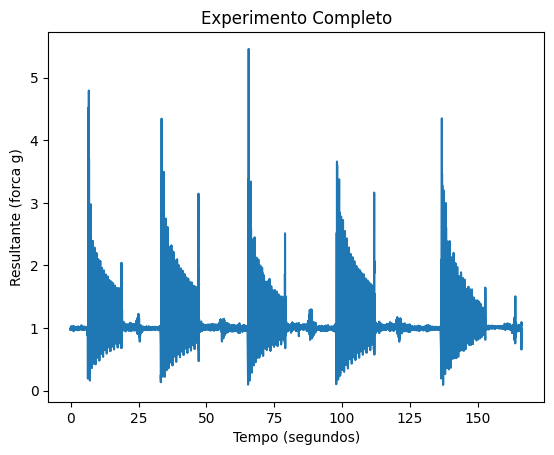

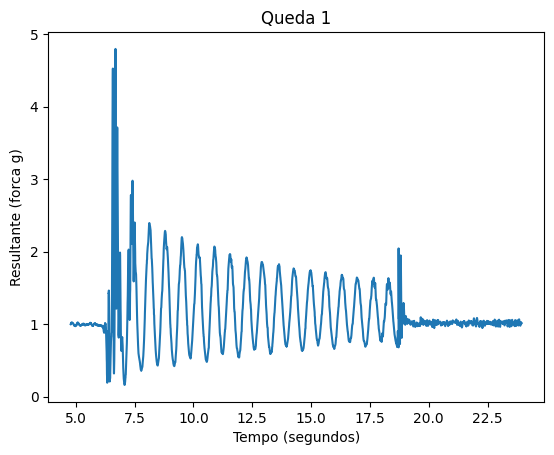

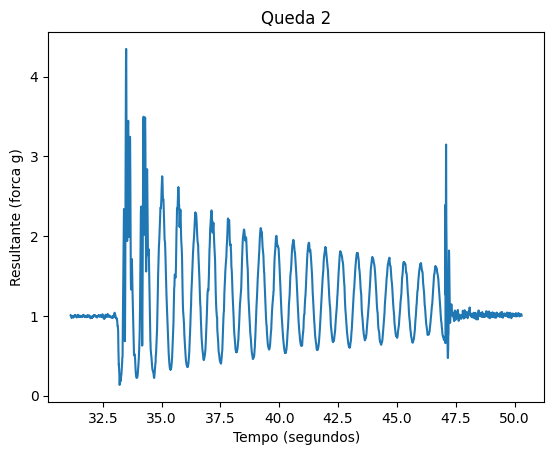

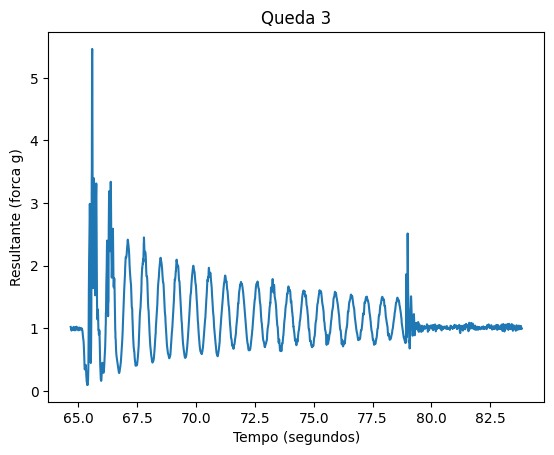

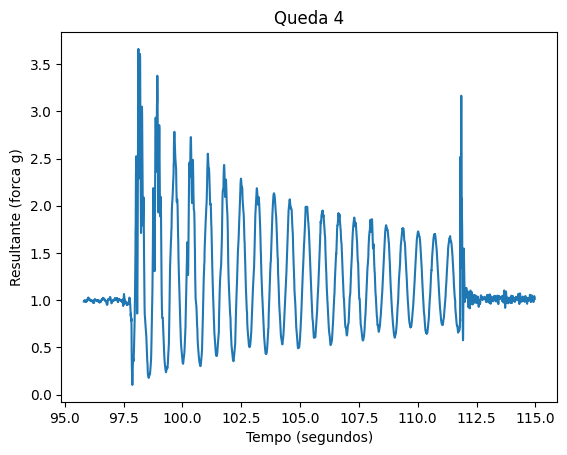

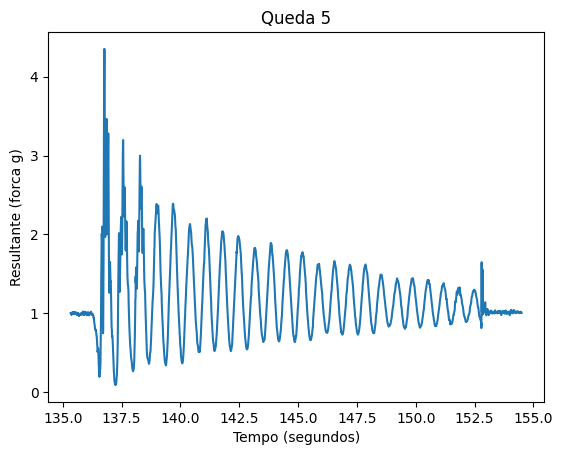

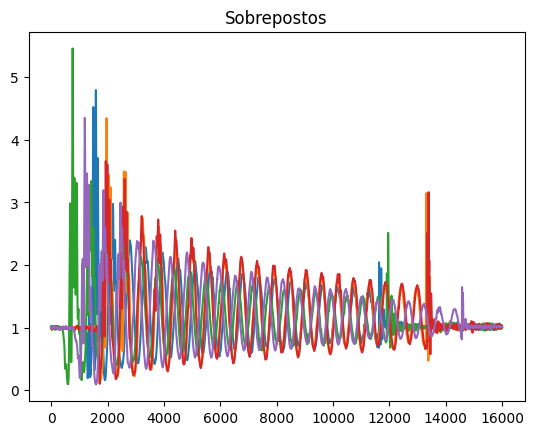

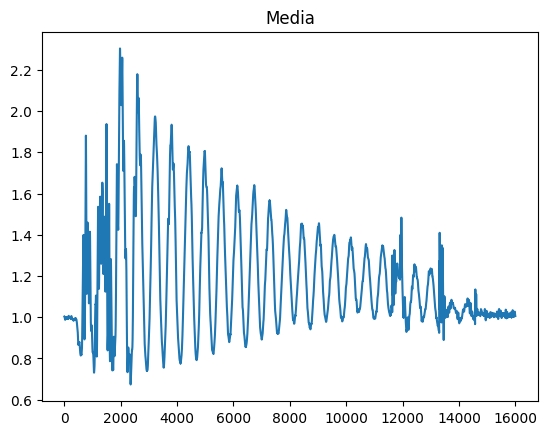

In [ ]:
acelerometro = pd.read_csv("/content/2023-05-1017.43.54.csv")

acelerometro = np.array(acelerometro)

x = acelerometro[:,0]
y = acelerometro[:,4]

fig, ax = plt.subplots()
plt.plot(x,y)
plt.title('Experimento Completo')
ax.set_xlabel('Tempo (segundos)')
ax.set_ylabel('Resultante (forca g)')

plt.show()

t0 = 4000
tf = 20000

x = acelerometro[t0:tf,0]
y = acelerometro[t0:tf,4]

fig, ax = plt.subplots()
plt.plot(x,y)
plt.title('Experimento 1')
ax.set_xlabel('Tempo (segundos)')
ax.set_ylabel('Resultante (forca g)')

plt.show()

t0 = 26000
tf = 42000


x = acelerometro[t0:tf,0]
y = acelerometro[t0:tf,4]

fig, ax = plt.subplots()
plt.plot(x,y)
plt.title('Experimento 2')
ax.set_xlabel('Tempo (segundos)')
ax.set_ylabel('Resultante (forca g)')

plt.show()

t0 = 54000
tf = 70000


x = acelerometro[t0:tf,0]
y = acelerometro[t0:tf,4]

fig, ax = plt.subplots()
plt.plot(x,y)
plt.title('Experimento 3')
ax.set_xlabel('Tempo (segundos)')
ax.set_ylabel('Resultante (forca g)')

plt.show()

t0 = 80000
tf = 96000


x = acelerometro[t0:tf,0]
y = acelerometro[t0:tf,4]

fig, ax = plt.subplots()
plt.plot(x,y)
plt.title('Experimento 4')
ax.set_xlabel('Tempo (segundos)')
ax.set_ylabel('Resultante (forca g)')

plt.show()

t0 = 113000
tf = 129000


x = acelerometro[t0:tf,0]
y = acelerometro[t0:tf,4]

fig, ax = plt.subplots()
plt.plot(x,y)
plt.title('Experimento 5')
ax.set_xlabel('Tempo (segundos)')
ax.set_ylabel('Resultante (forca g)')

plt.show()

total = []
t0 = 4000
tf = 20000
y = acelerometro[t0:tf,4]
total.append(list(y))
plt.plot(y)
t0 = 26000
tf = 42000
y = acelerometro[t0:tf,4]
total.append(list(y))
plt.plot(y)
t0 = 54000
tf = 70000
y = acelerometro[t0:tf,4]
total.append(list(y))
plt.plot(y)
t0 = 80000
tf = 96000
y = acelerometro[t0:tf,4]
total.append(list(y))
plt.plot(y)
t0 = 113000
tf = 129000
y = acelerometro[t0:tf,4]
total.append(list(y))

plt.plot(y)
plt.title('Sobrepostos')
ax.set_xlabel('Tempo (segundos)')
ax.set_ylabel('Resultante (forca g)')
plt.show(block=False)



media = []
for i in range(len(total[0])):
  media.append(np.average([row[i] for row in total]))
plt.plot(media)
plt.title('Média')
ax.set_xlabel('Tempo (segundos)')
ax.set_ylabel('Resultante (forca g)')
plt.show(block=False)

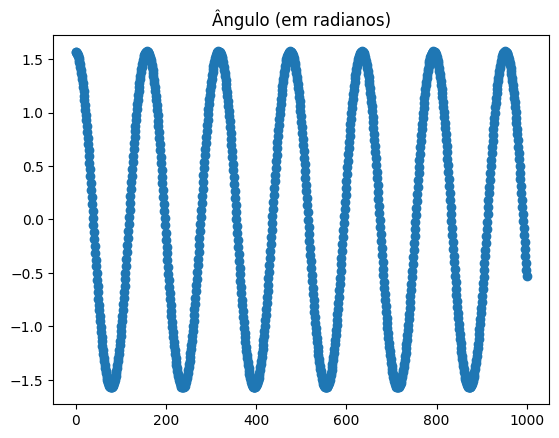

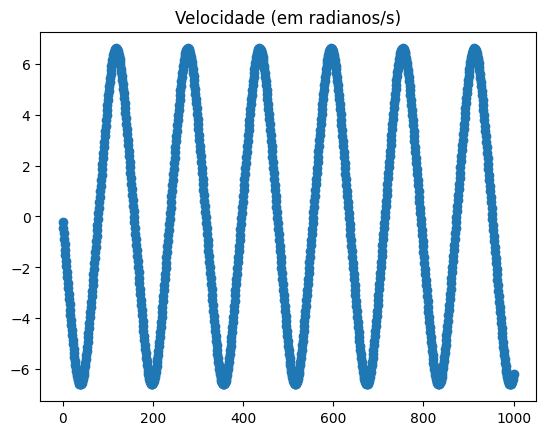

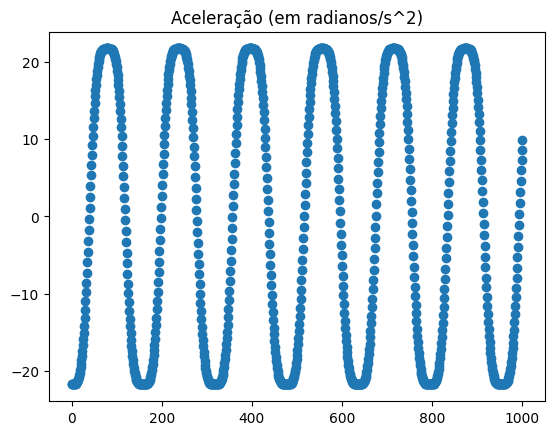

In [ ]:
def Analitica(l, theta0, t0, tf, v0, dt):
  theta = theta0;
  t = t0;
  v = v0;
  g = -9.8;
  vthetaa = []
  vva = []
  vaa = []
  while(t <= tf):
    a = (g * np.sin(theta))/l
    v = a*dt + v
    theta = theta + v*dt
    vaa.append(a)
    vthetaa.append(theta)
    vva.append(v)
    t += dt

  return vthetaa, vva, vaa

vthetaa, vva, vaa = Analitica(0.45, np.pi/2, 0, 10, 0, 0.01)

plt.figure(0)
plt.plot(vthetaa, linestyle='', marker='o') 
plt.title('Ângulo (em radianos)')
plt.show()

plt.figure(1)
plt.plot(vva, linestyle='', marker='o') 
plt.title('Velocidade (em radianos/s)')
plt.show()

plt.figure(2)
plt.plot(vaa, linestyle='', marker='o') 
plt.title('Aceleração (em radianos/s^2)')
plt.show()

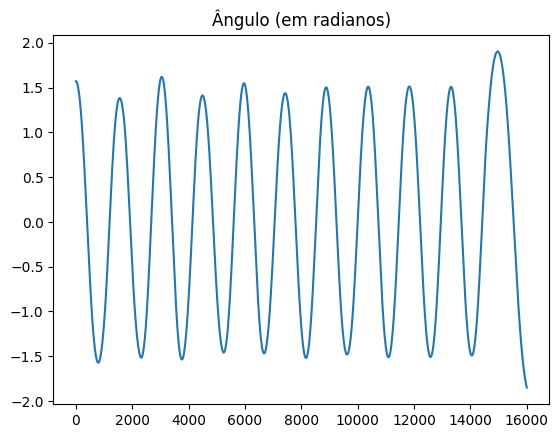

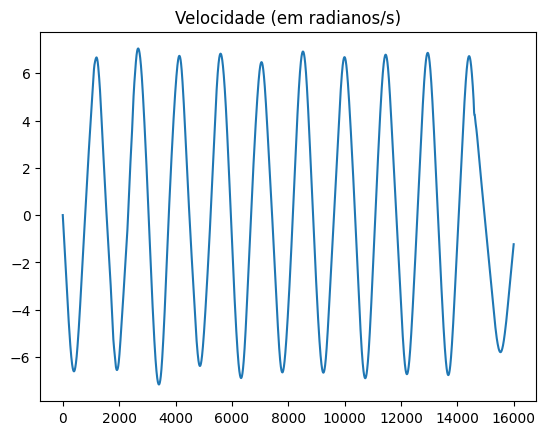

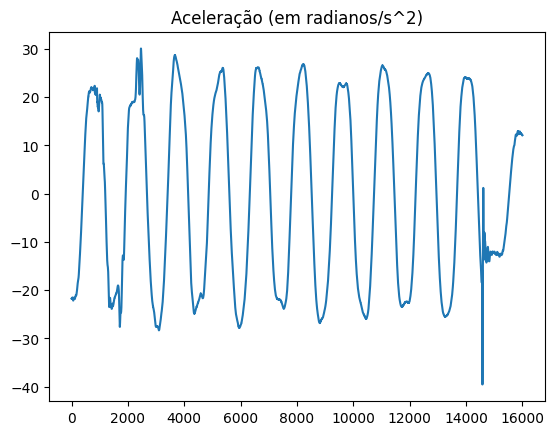

In [ ]:
def Euler(l, theta0, v0, t0, tf, dt, acelerometro):
  theta = theta0
  t = t0*1000
  t = int(t)
  tf *= 1000
  tf = int(tf)
  v = v0
  vthetae = []
  vve = []
  vae = []
  i = 0
  while(t < tf - dt):
    vthetae.append(theta)
    vve.append(v)
    dt *= 1000
    dt = int(dt)
    t += dt
    aceleracao = acelerometro[t:(t + dt),3]
    #vae.append(aceleracao[0]*(9.8)-(9.8))
    a = ((aceleracao[0]*(9.8)-(9.8))*np.sin(theta))/l
    vae.append(a)
    dt = dt/1000
    v = v + a*dt
    theta = theta + v*dt
  
  return vthetae, vve, vae

vthetae, vve, vae = Euler(0.45, np.pi/2, 0, 113, 129, 0.001, acelerometro)

plt.figure(0)
plt.plot(vthetae) 
plt.title('Ângulo (em radianos)')
plt.show()

plt.figure(1)
plt.plot(vve) 
plt.title('Velocidade (em radianos/s)')
plt.show()

plt.figure(2)
plt.plot(vae) 
plt.title('Aceleração (em radianos/s^2)')
plt.show()